# **Stock Price Prediction Using Machine Learning with LSTM**

---

## **Project Overview**

This project involves building a stock price prediction model for leading tech companies using historical data, with an emphasis on visualizing key trends and patterns in stock prices and volumes. By leveraging machine learning—specifically, a Long Short-Term Memory (LSTM) neural network—the project aims to predict future prices for each stock and analyze factors affecting price fluctuations. The four companies selected for this study are Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN).

---

## **1. Data Collection and Preparation**

Using Yahoo Finance, we gather historical data on:
- **Adjusted Closing Price**: The adjusted closing price accounts for corporate actions like stock splits and dividends.
- **Volume**: The total number of shares traded daily.

After loading and inspecting the data, we clean and concatenate it into a single DataFrame. This consolidated data serves as the basis for both the LSTM model and the stock price analysis.

---

## **2. Stock Price Analysis**

This section covers various key financial metrics that help us better understand stock trends and risk:

### **2.1 Historical Price Trends**

In this section, we plot the **Adjusted Closing Price** of each stock over time, allowing us to visually assess price fluctuations and identify trends in each company's stock performance.

### **2.2 Trading volumes**
We plot trading volume to gauge investor activity. High trading volume often reflects significant news, earnings announcements, or other impactful events.

### **2.3 Moving Averages:**

- **Short-Term Moving Average (e.g., 10-day):** Used to gauge recent price trends, reflecting short-term momentum in the stock’s price.

- **Medium-Term Moving Average (e.g., 20-day) and Long-Term Moving Average (e.g., 50-day):** These indicators help identify trends and potential shifts. For instance, when a short-term moving average crosses above a long-term average, it might signal a bullish trend (uptrend) in the stock price.

### **2.4 Daily Returns:**
The daily return calculation indicates the percentage change in the adjusted closing price from one day to the next. Analyzing these returns helps evaluate volatility, where high fluctuations signify higher risk and opportunity.

### **2.5 Distribution of Daily Returns:**
 Histograms show how returns are distributed, with most values near zero, indicating that small daily price changes are common. Extreme values represent unusually large price changes, often linked to impactful events.

### **2.6 Risk vs. Expected Return:**

- **Expected Return:** The average of daily returns over the selected period.

- **Risk (Standard Deviation):** This quantifies price volatility. A higher standard deviation suggests more price fluctuation and, therefore, more investment risk.

The scatter plot of risk vs. expected return allows investors to assess whether a stock's potential return compensates for its level of risk.

In [3]:
!pip install -q yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# Defining the stocks and time range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading data directly using yfinance
data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

# Adding company name column and concatenating data
company_list = []
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for (stock, df), com_name in zip(data.items(), company_name):
    df["company_name"] = com_name
    company_list.append(df)

df = pd.concat(company_list, axis=0)
df.tail()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-29 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-30 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-31 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-11-01 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   

Price                     Adj Close Close High  ...       Low Open Volume  \
Ticker                         GOOG  GOOG GOOG  ... MSFT MSFT MSFT   MSFT   
Date                                            ...                         
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-29 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-30 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-31 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-11-01 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   

Price                       Adj Close       Close        High         Low  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Date                                                                        
2024-10-28 00:00:00+00:00  188.389999  188.389999  190.210007  188.210007   
2024-10-29 00:00:00+00:00  190.830002  190.830002  191.460007  187.820007   
2024-10-30 00:00:00+00:00  192.729996  192.729996  195.610001  192.419998   
2024-10-31 00:00:00+00:00  186.399994  186.399994  190.600006  185.229996   
2024-11-01 00:00:00+00:00  198.889999  198.889999  200.500000  197.020004   

Price                            Open      Volume  
Ticker                           AMZN        AMZN  
Date                                               
2024-10-28 00:00:00+00:00  189.570007  27930800.0  
2024-10-29 00:00:00+00:00  188.580002  35690200.0  
2024-10-30 00:00:00+00:00  194.699997  37707600.0  
2024-10-31 00:00:00+00:00  190.509995  74225400.0  
2024-11-01 00:00:00+00:00  198.899994  66995940.0  

[5 rows x 25 columns]

In [2]:
data['GOOG'].describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,157.575536,157.850158,159.365699,156.365458,157.791190,1.997961e+07
std,16.353242,16.316355,16.554256,16.227237,16.434626,8.274925e+06
min,127.257477,127.570000,127.739998,124.925003,125.339996,7.409100e+06
25%,142.370361,142.720001,143.979996,141.520004,142.910004,1.492840e+07
50%,158.800018,158.990005,161.014999,157.610001,158.589996,1.787720e+07
75%,169.413956,169.830002,171.339996,167.910004,169.690002,2.187770e+07
max,192.406723,192.660004,193.309998,190.619995,191.750000,5.972800e+07


In [3]:
# Check the structure and content of the DataFrame
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2023-11-01 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Close, AAPL)      253 non-null    float64
 2   (High, AAPL)       253 non-null    float64
 3   (Low, AAPL)        253 non-null    float64
 4   (Open, AAPL)       253 non-null    float64
 5   (Volume, AAPL)     253 non-null    float64
 6   (company_name, )   1012 non-null   object 
 7   (Adj Close, GOOG)  253 non-null    float64
 8   (Close, GOOG)      253 non-null    float64
 9   (High, GOOG)       253 non-null    float64
 10  (Low, GOOG)        253 non-null    float64
 11  (Open, GOOG)       253 non-null    float64
 12  (Volume, GOOG)     253 non-null    float64
 13  (Adj Close, MSFT)  253 non-null    float64
 14  (Close, MSFT)      253 non-null    float64
 15  (High, MSFT)       253 n

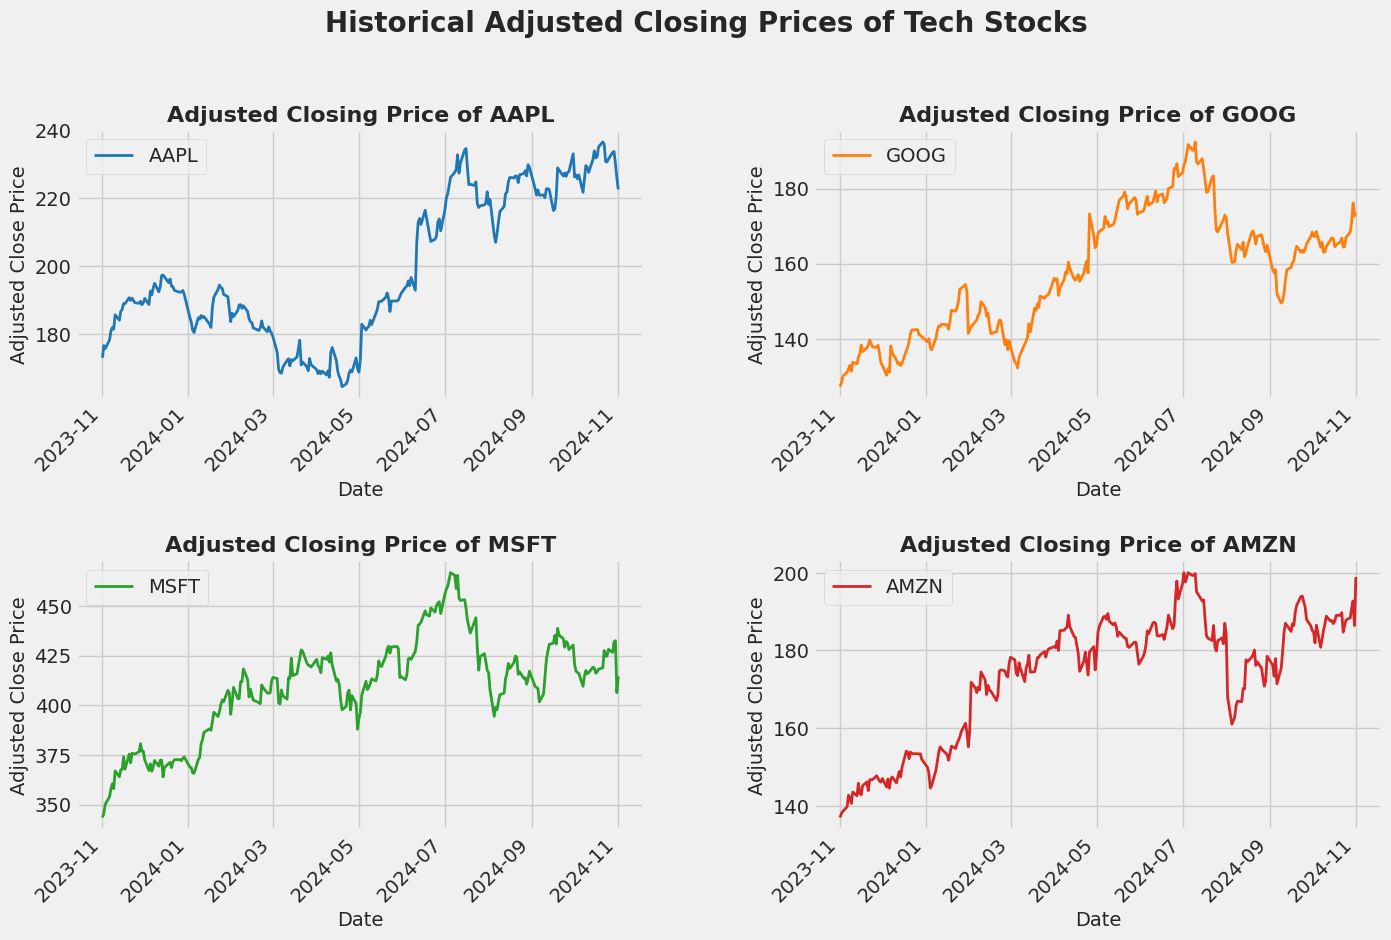

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Creating a figure and an array of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.6, wspace=0.3)  # Adjust spacing

# Defining colors for each company
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Looping through each company to create subplots
for ax, (stock, company), color in zip(axes.flatten(), zip(tech_list, company_list), colors):
    # Plotting the 'Adj Close' price
    company['Adj Close'].plot(ax=ax, color=color, label='Adj Close', linewidth=2)

    # Adding title and labels
    ax.set_title(f"Adjusted Closing Price of {stock}", fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Adjusted Close Price', fontsize=14)

    # Adding a legend
    ax.legend(loc='upper left')

    # Formatting the x-axis for better date visibility
    ax.tick_params(axis='x', rotation=45)

# Setting a main title for the entire figure
plt.suptitle('Historical Adjusted Closing Prices of Tech Stocks', fontsize=20, fontweight='bold', y=1.02)

# Showing the plot
plt.show()



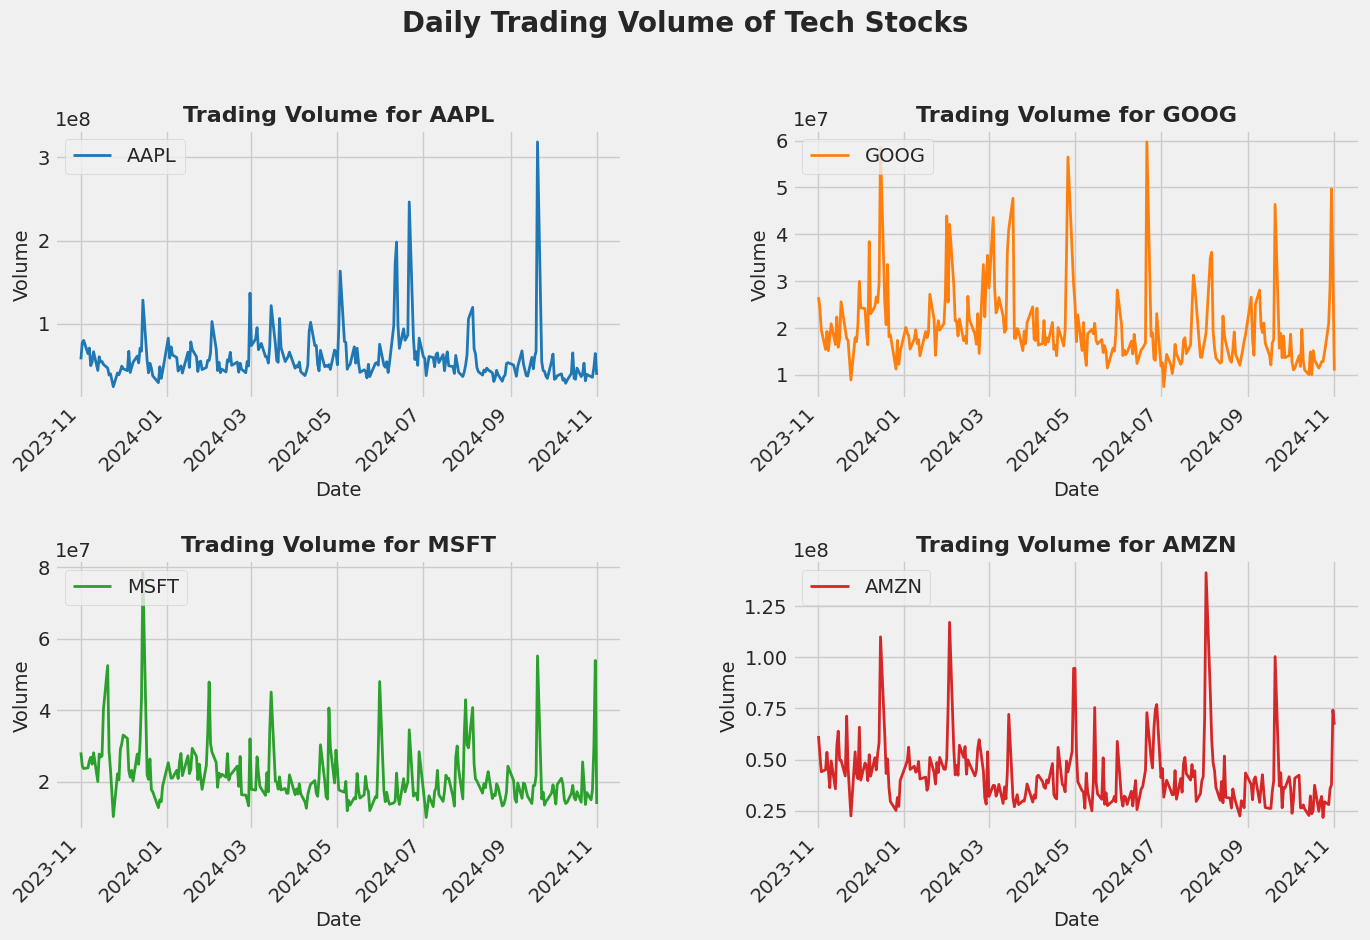

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Creating a figure and an array of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.6, wspace=0.3)  # Adjust spacing

# Defining colors for each company
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Looping through each company to create subplots for volume
for ax, (stock, company), color in zip(axes.flatten(), zip(tech_list, company_list), colors):
    # Plotting the trading volume
    company['Volume'].plot(ax=ax, color=color, label='Volume', linewidth=2)

    # Adding title and labels
    ax.set_title(f"Trading Volume for {stock}", fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Volume', fontsize=14)

    # Adding a legend
    ax.legend(loc='upper left')

    # Formatting the x-axis for better date visibility
    ax.tick_params(axis='x', rotation=45)

# Setting a main title for the entire figure
plt.suptitle('Daily Trading Volume of Tech Stocks', fontsize=20, fontweight='bold', y=1.02)

# Showing the plot
plt.show()


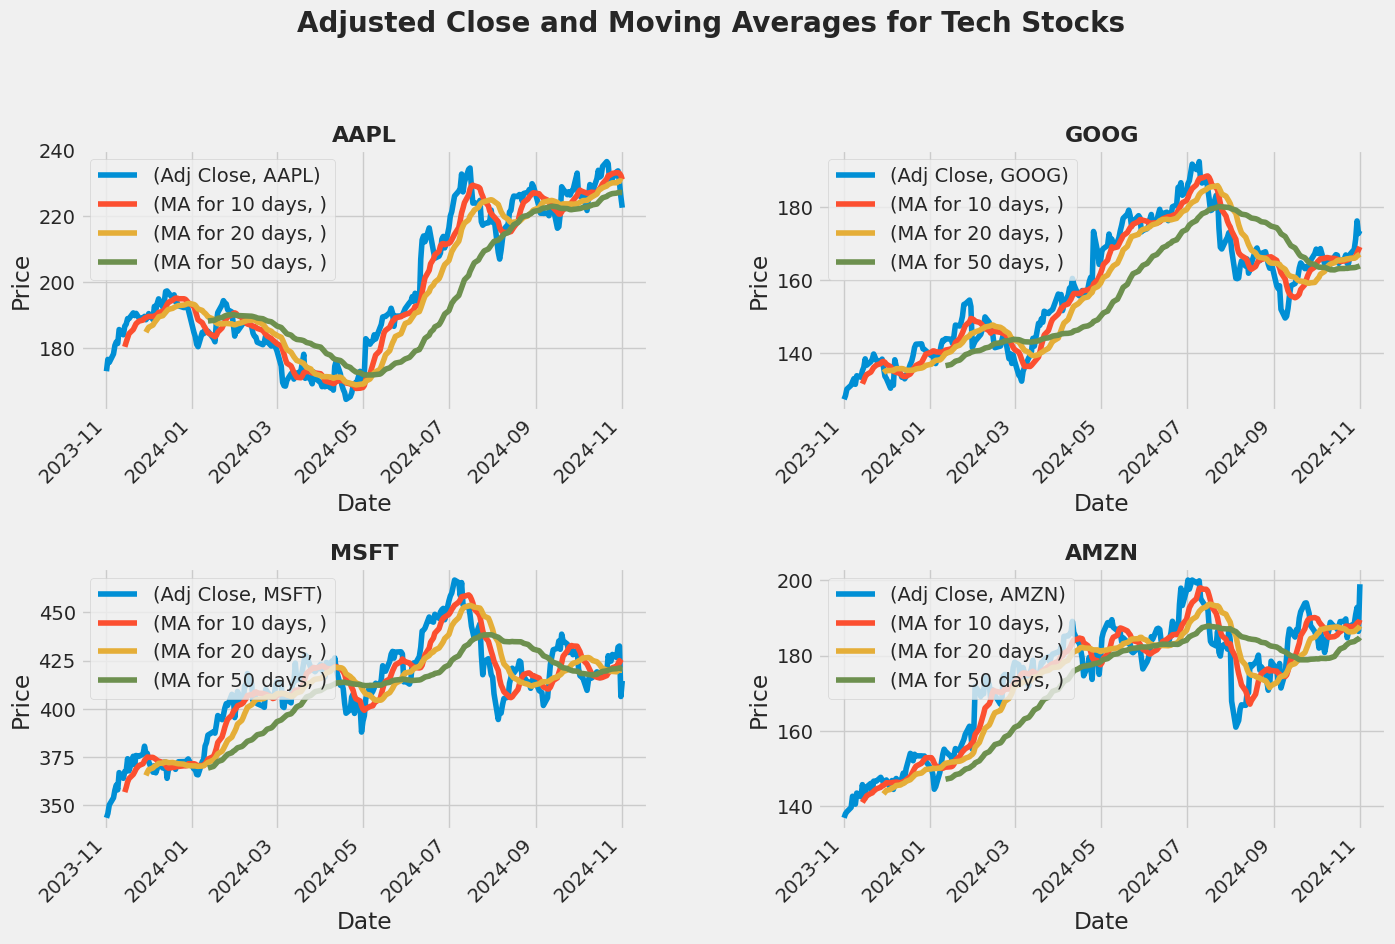

In [6]:
# Defining the moving average days
ma_day = [10, 20, 50]

# Calculating moving averages for each stock in company_list
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plotting adjusted close and moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjust spacing for clarity

# Iterating through company_list and tech_list to plot each stock
for ax, (stock, company) in zip(axes.flatten(), zip(tech_list, company_list)):
    company[['Adj Close'] + [f"MA for {ma} days" for ma in ma_day]].plot(ax=ax)
    ax.set_title(stock, fontsize=16, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.suptitle('Adjusted Close and Moving Averages for Tech Stocks', fontsize=20, fontweight='bold', y=1.02)
plt.show()


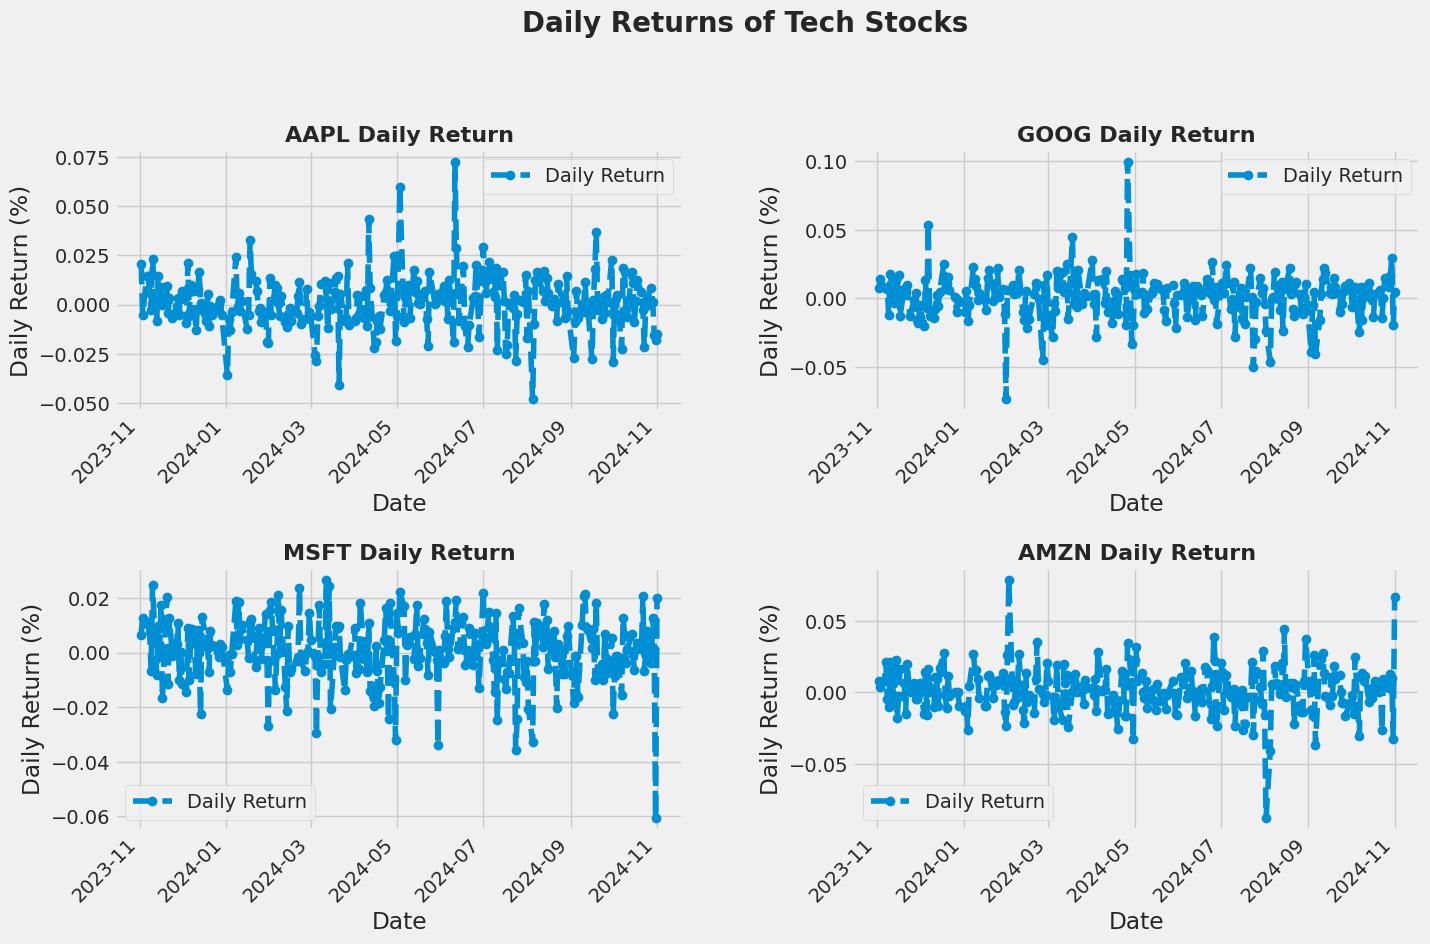

In [7]:
# Calculating daily return percentage for each company in company_list
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjust spacing for clarity

# Iterating through company_list and tech_list to plot each stock's daily return
for ax, (stock, company) in zip(axes.flatten(), zip(tech_list, company_list)):
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(f'{stock} Daily Return', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return (%)')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.suptitle('Daily Returns of Tech Stocks', fontsize=20, fontweight='bold', y=1.02)
plt.show()


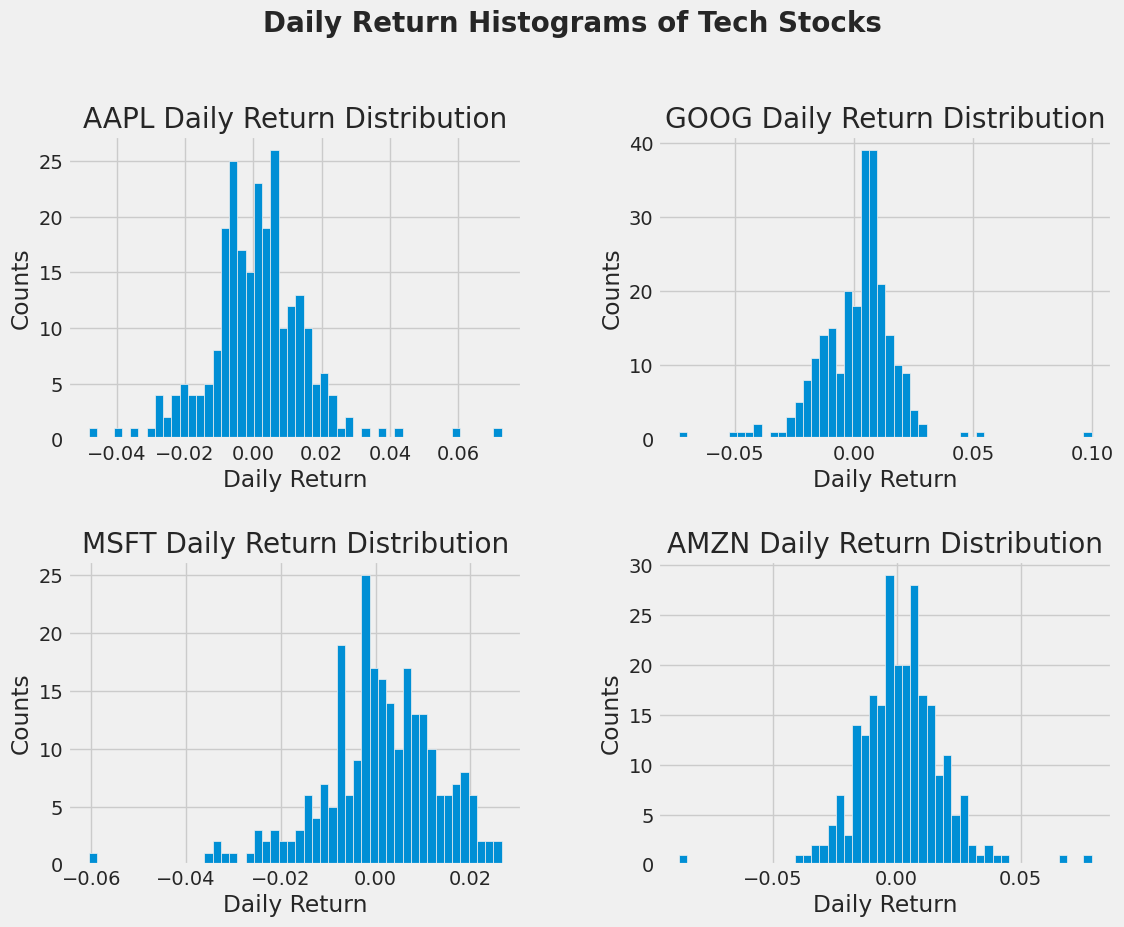

In [8]:
# Calculating daily return percentage for each company if not already done
for company in company_list:
    if 'Daily Return' not in company.columns:
        company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting histograms of daily returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing

# Looping through tech_list and company_list to plot each company's histogram
for ax, (stock, company) in zip(axes.flatten(), zip(tech_list, company_list)):
    company['Daily Return'].hist(bins=50, ax=ax)
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Counts')
    ax.set_title(f'{stock} Daily Return Distribution')

plt.suptitle('Daily Return Histograms of Tech Stocks', fontsize=20, fontweight='bold', y=1.02)
plt.show()


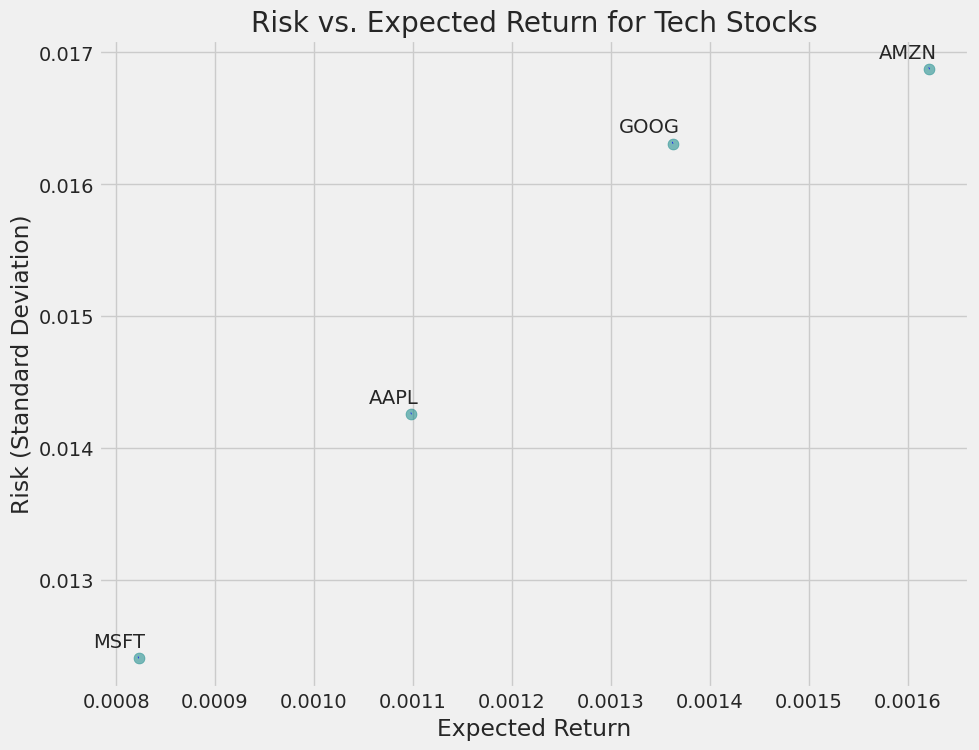

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a DataFrame to store daily returns for each company
daily_returns = pd.DataFrame()

# Calculating daily returns and store in daily_returns DataFrame
for stock, company in zip(tech_list, company_list):
    daily_returns[stock] = company['Adj Close'].pct_change()

# Droping NaN values
daily_returns = daily_returns.dropna()

# Defining marker size for scatter plot
area = np.pi * 20

# Plotting risk vs. expected return for each stock
plt.figure(figsize=(10, 8))
plt.scatter(daily_returns.mean(), daily_returns.std(), s=area, alpha=0.5, color='teal')
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')
plt.title('Risk vs. Expected Return for Tech Stocks')

# Annotating each point with stock label
for label, x, y in zip(daily_returns.columns, daily_returns.mean(), daily_returns.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 5),
                 textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


##**3. Building and Training the LSTM Model**

The LSTM (Long Short-Term Memory) network is a type of Recurrent Neural Network (RNN) particularly suited to time-series data, such as stock prices, as it captures temporal dependencies.

1. **Data Scaling:** We use MinMaxScaler to normalize data between 0 and 1, enabling the model to converge faster and perform more accurately.
2. **Training Data Preparation:** We use the last 60 days of stock prices to predict the next day’s price. This sliding-window approach provides the LSTM with relevant historical data to learn patterns.

3. **LSTM Network Architecture:** The network includes two LSTM layers and two Dense layers. The LSTM layers capture sequential dependencies, while the Dense layers output the predicted price.

4. **Model Training:** The model is trained to minimize mean squared error (MSE), aiming to reduce the difference between predicted and actual prices.

##**4. Testing and Performance Evaluation**

To evaluate model performance, we test it on unseen data and compare predictions against actual prices. A Root Mean Squared Error (RMSE) metric quantifies accuracy. A low RMSE indicates that the model’s predictions are close to actual values, demonstrating effective learning.

##**5. Visualization of Predictions**
We plot the training data, validation data, and the LSTM model’s predictions on a single chart. This helps visually assess the model’s predictive performance and highlights areas where it aligns or deviates from actual price trends.

##**6 .Conclusion**
This project provides an in-depth exploration of stock price trends and an LSTM-based predictive model. By combining historical analysis with machine learning, it offers insights into stock behavior and gives investors tools to make data-driven decisions based on projected prices. Key financial metrics such as moving averages, daily returns, and risk vs. return analysis provide foundational understanding, while the LSTM model offers a predictive layer, supporting more informed investment choices.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0265
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step


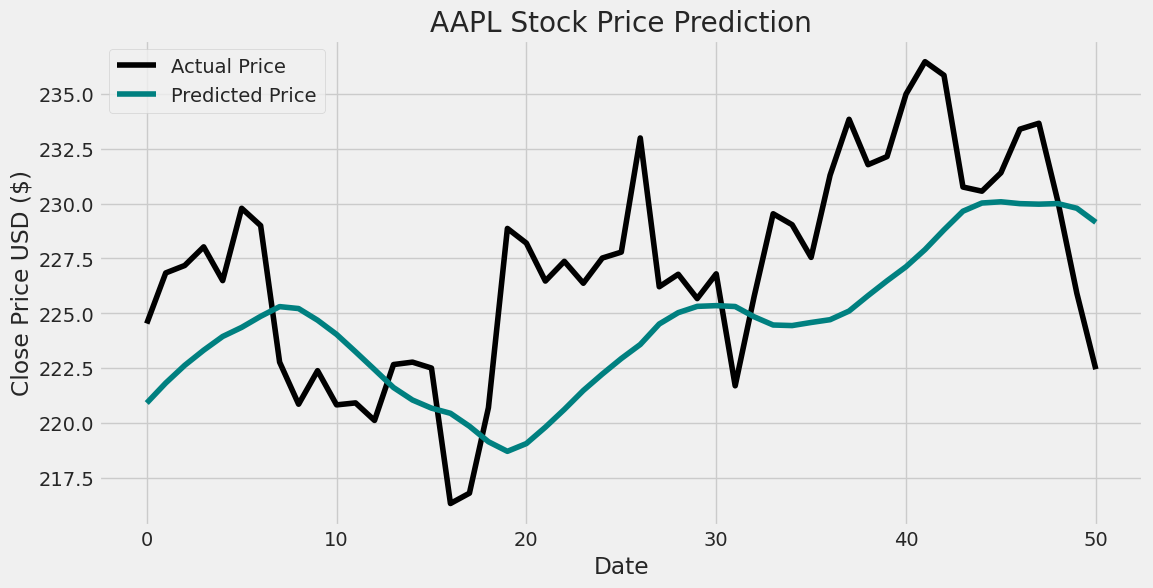

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0495
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step


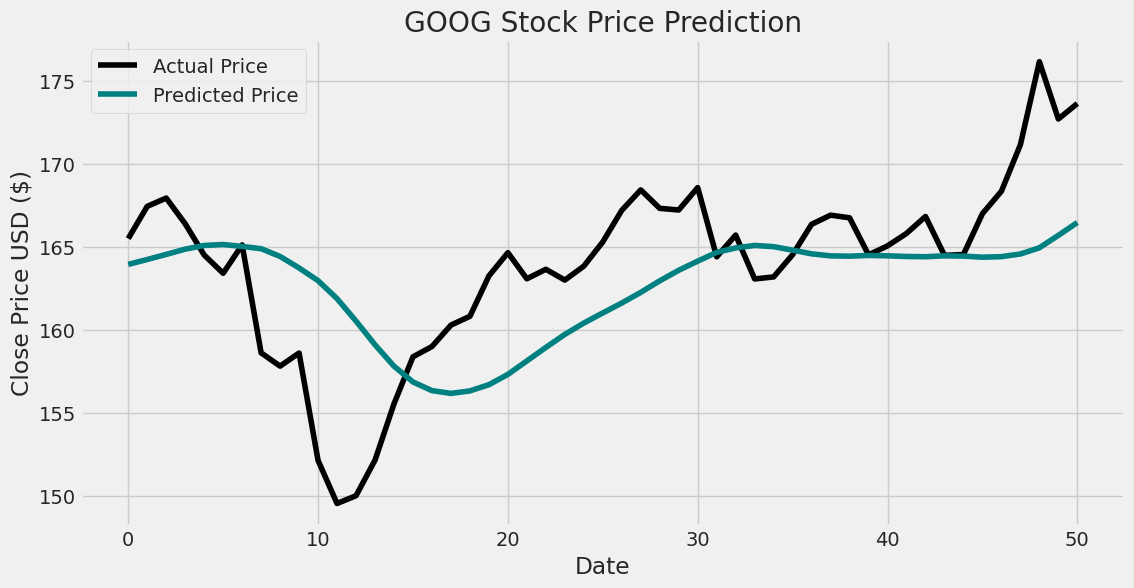

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0684


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step


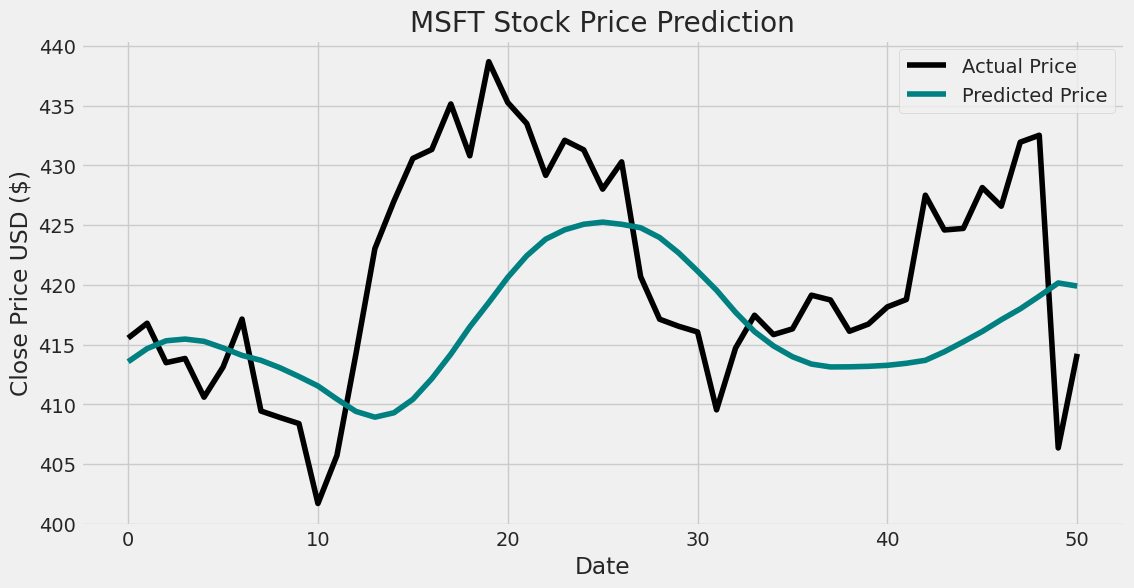

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0420
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step


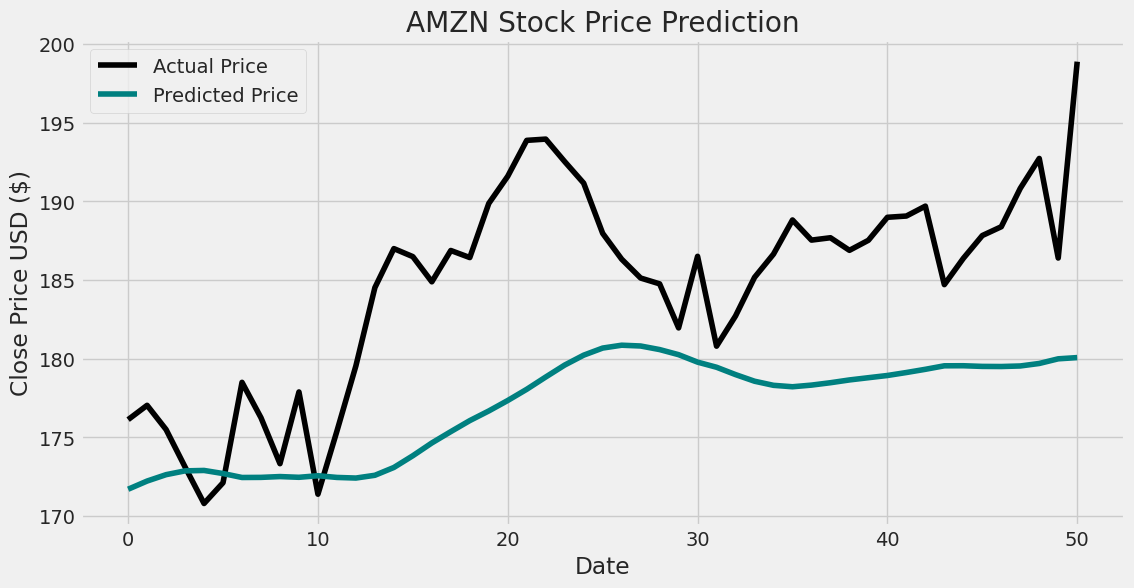

AAPL RMSE: 4.858165096690938
GOOG RMSE: 4.942698350343897
MSFT RMSE: 9.577333788950144
AMZN RMSE: 8.992971114568443


In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf

# Defining parameters
look_back = 60  # Number of previous days to look back for predictions
epochs = 1
batch_size = 1

# Defining stock list and downloading historical data
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Downloading data
data = {stock: yf.download(stock, start=start_date, end=end_date) for stock in tech_list}

# Initializing scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Function to create sequences of data for training
def create_sequences(data, look_back):
    x, y = [], []
    for i in range(look_back, len(data)):
        x.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Dictionary to hold models and results
predictions = {}
actual_prices = {}

for stock, df in data.items():
    df = df[['Close']].dropna()  # Use 'Close' column and drop any NaNs
    dataset = df.values

    # Scaling the dataset
    scaled_data = scaler.fit_transform(dataset)

    # Spliting into training and testing data
    training_data_len = int(len(dataset) * 0.8)
    train_data = scaled_data[:training_data_len]
    test_data = scaled_data[training_data_len - look_back:]

    # Creating training and testing sequences
    x_train, y_train = create_sequences(train_data, look_back)
    x_test, y_test = create_sequences(test_data, look_back)

    # Reshaping data to fit LSTM (samples, timesteps, features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Building the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    # Getting the predicted values for the test set
    predictions[stock] = scaler.inverse_transform(model.predict(x_test))
    actual_prices[stock] = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plotting actual vs predicted prices for each stock
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices[stock], color='black', label='Actual Price')
    plt.plot(predictions[stock], color='teal', label='Predicted Price')
    plt.title(f'{stock} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend()
    plt.show()

#Calculating RMSE for each stock
for stock in tech_list:
    rmse = np.sqrt(np.mean((predictions[stock] - actual_prices[stock]) ** 2))
    print(f'{stock} RMSE: {rmse}')


